# **Lasso Regularization**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# **Lasso Regularization on 2D data**

Hyperparameters:
- alpha
- fit_intercept
- tol - tolerance of coef
- max_iter = GD

[26.8713436]
-1.713522373896547


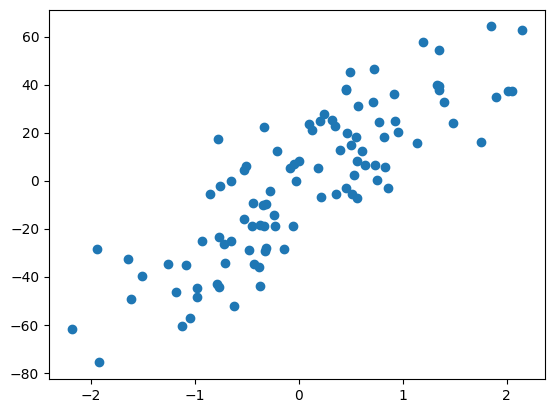

In [5]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

## Comparison of Best Fit Line for various values of alpha

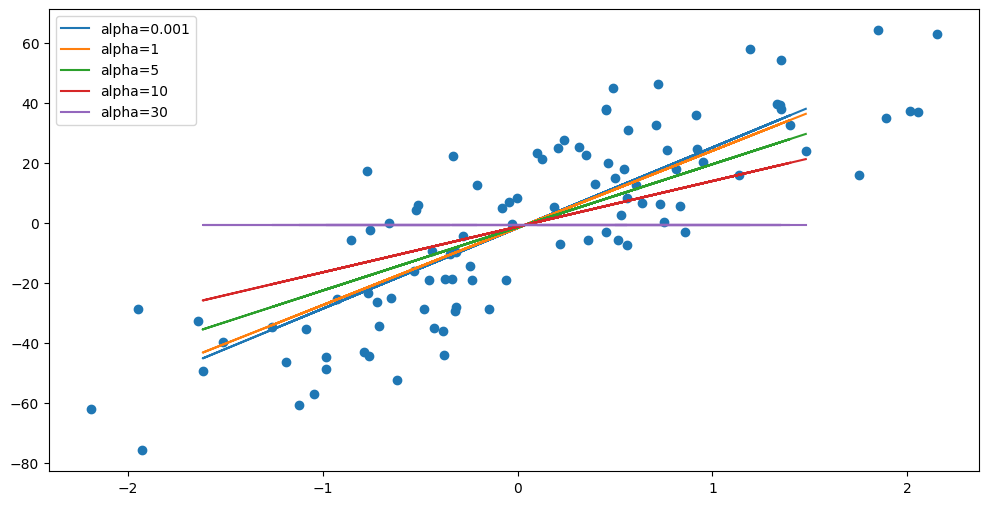

In [7]:
alphas = [0.001,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()
    

# **Lasso Regularization on Polynomial Data**

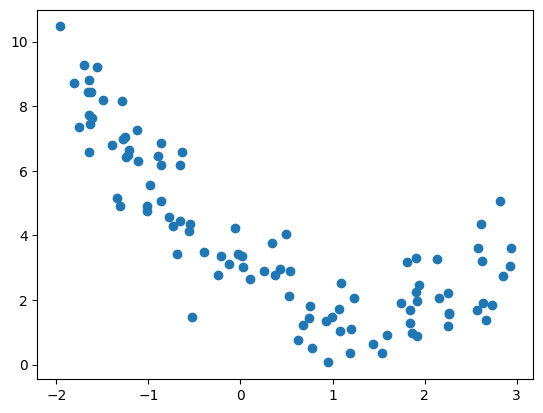

In [8]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

## Comparison of Best Fit Curve for various values of alpha

c:\Users\shrir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e-01, tolerance: 6.404e-02
  model = cd_fast.enet_coordinate_descent(


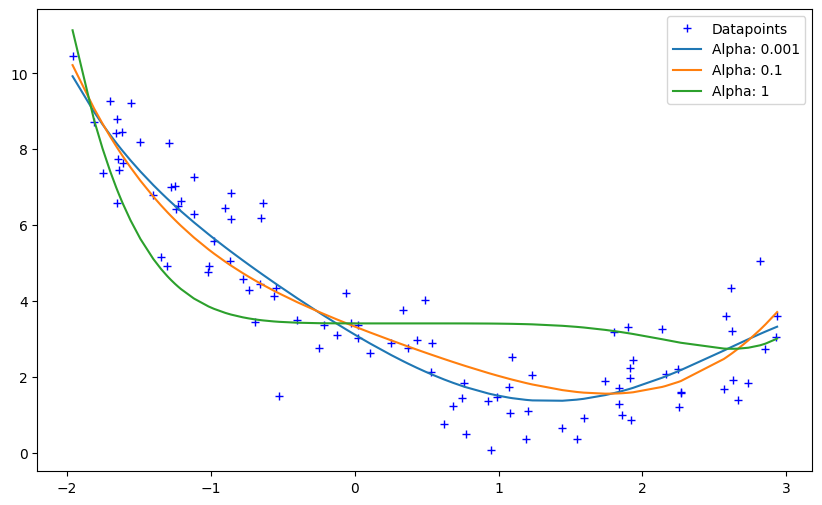

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('std', StandardScaler()),
        ('poly_feats', PolynomialFeatures(degree=6)),
        ('lasso', Lasso(alpha=alpha, max_iter=1000, fit_intercept=True, random_state=42, ))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0.001, 0.1, 1]

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha in alphas:
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()